In [1]:
# imports
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
import seaborn as sns
import pickle

In [2]:
# Extract the dataframe (aggregated)
path1 = "../dataframes/df_aggregated.pk1"
with open(path1, "rb") as f:
    df = pickle.load(f)


In [3]:
df

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,abdominal aortic aneurysm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abdominal hernia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abscess of nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abscess of the lung,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abscess of the pharynx,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,white blood cell disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
769,whooping cough,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
770,wilson disease,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
771,yeast infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Build similarity matrix

### Using cosine similarity
goal is to measure the direct similarity between diseases based on their symptom vectors (or features),

In [4]:
# Get disease names
diseases = df.iloc[:, 0]


In [5]:
# Extract symptom matrix 
symptom_matrix = df.iloc[:, 1:].values  

# Check dimensions
print("Number of diseases:", len(diseases))
print("Number of symptoms:", symptom_matrix.shape[1])
print("Symptom matrix shape:", symptom_matrix.shape)

Number of diseases: 773
Number of symptoms: 377
Symptom matrix shape: (773, 377)


In [6]:
# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(symptom_matrix)

In [7]:
# Convert similarity matrix to df
cosine_df = pd.DataFrame(cosine_sim_matrix, index=diseases, columns=diseases)
print("Cosine Similarity Matrix:\n", cosine_df)

Cosine Similarity Matrix:
 diseases                   abdominal aortic aneurysm  abdominal hernia  \
diseases                                                                 
abdominal aortic aneurysm                   1.000000          0.129099   
abdominal hernia                            0.129099          1.000000   
abscess of nose                             0.000000          0.000000   
abscess of the lung                         0.204124          0.000000   
abscess of the pharynx                      0.000000          0.000000   
...                                              ...               ...   
white blood cell disease                    0.136083          0.105409   
whooping cough                              0.182574          0.000000   
wilson disease                              0.000000          0.000000   
yeast infection                             0.136083          0.105409   
zenker diverticulum                         0.000000          0.000000   

diseases  

In [8]:
# Set diagonal values to 0 (self-similarity)
np.fill_diagonal(cosine_sim_matrix, 0)

# Find max similarity value (off-diagonal)
max_sim = np.max(cosine_sim_matrix)

# Find disease pairs with max similarity
max_pairs = np.argwhere(cosine_sim_matrix == max_sim)

print(f"Highest Cosine Similarity: {max_sim:.4f}")
for i, j in max_pairs:
    print(f"{diseases[i]} ↔ {diseases[j]}")

Highest Cosine Similarity: 1.0000
dislocation of the knee ↔ dislocation of the patella
dislocation of the patella ↔ dislocation of the knee


In [9]:
# Compute cosine similarity matrix
# cosine_sim_matrix = cosine_similarity(symptom_matrix)
# cosine_df = pd.DataFrame(cosine_sim_matrix, index=diseases, columns=diseases)

# np.fill_diagonal(cosine_sim_matrix, 0)

# Extract upper triangle (to avoid duplicate pairs)
upper_triangle_indices = np.triu_indices_from(cosine_sim_matrix, k=1)

# Get disease pairs and similarity scores
similarity_scores = cosine_sim_matrix[upper_triangle_indices]
disease_pairs = [(diseases[i], diseases[j]) for i, j in zip(*upper_triangle_indices)]

# df disease pairs and similarities
similarity_df = pd.DataFrame(disease_pairs, columns=["Disease 1", "Disease 2"])
similarity_df["Cosine Similarity"] = similarity_scores


In [10]:
# Get top 50 similar diseases
top_50_similar = similarity_df.sort_values(by="Cosine Similarity", ascending=False).head(50)
print(top_50_similar)

                                    Disease 1  \
128725                dislocation of the knee   
260429               open wound of the finger   
190131                        heart contusion   
106541                       corneal disorder   
119683                             depression   
291476                          skin disorder   
217081             infectious gastroenteritis   
290006                   seborrheic keratosis   
284544                     psychotic disorder   
232878                           kidney stone   
291592             skin pigmentation disorder   
273708                   personality disorder   
290005                   seborrheic keratosis   
124872                   diabetic retinopathy   
124646                   diabetic retinopathy   
136590                   drug abuse (opioids)   
73441                                cataract   
237053                           liver cancer   
107093                       corneal disorder   
11461               

In [11]:
top_50_similar

,Disease 1,Disease 2,Cosine Similarity
128725,dislocation of the knee,dislocation of the patella,1.000000
260429,open wound of the finger,open wound of the hand,1.000000
190131,heart contusion,kaposi sarcoma,1.000000
106541,corneal disorder,dry eye of unknown cause,0.953463
119683,depression,post-traumatic stress disorder (ptsd),0.953463
291476,skin disorder,skin polyp,0.953463
217081,infectious gastroenteritis,noninfectious gastroenteritis,0.916667
290006,seborrheic keratosis,skin polyp,0.909091
284544,psychotic disorder,schizophrenia,0.909091
232878,kidney stone,pyelonephritis,0.909091


In [12]:
similarity_df

,Disease 1,Disease 2,Cosine Similarity
0,abdominal aortic aneurysm,abdominal hernia,0.129099
1,abdominal aortic aneurysm,abscess of nose,0.000000
2,abdominal aortic aneurysm,abscess of the lung,0.204124
3,abdominal aortic aneurysm,abscess of the pharynx,0.000000
4,abdominal aortic aneurysm,acanthosis nigricans,0.000000
...,...,...,...
298373,whooping cough,yeast infection,0.000000
298374,whooping cough,zenker diverticulum,0.258199
298375,wilson disease,yeast infection,0.000000
298376,wilson disease,zenker diverticulum,0.000000


## Agglomerative hierarchical clustering (AHC)
Hierarchical clustering iteratively identifies groups of nodes with high similarity.
Agglomerative algorithms merge nodes and communities with high similarity. 

In this case...
Start with individual diseases as separate clusters.
Calculate distances between each disease using cosine distance (1 - similarity).
Iteratively merge the closest clusters using Ward’s method (minimizing variance).
Continue merging until a single cluster remains.
Visualize the clustering structure in a dendrogram.


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Using top 50 just for general analysis

In [14]:
# Extract disease pairs and their cosine similarity values
disease_pairs = top_50_similar[['Disease 1', 'Disease 2']].values
similarity_values = top_50_similar['Cosine Similarity'].values

In [15]:
# Create a disease list from the top 50 pairs (unique diseases)
diseases_list = np.unique(disease_pairs)

In [16]:
# Create a zero matrix for the similarity values between diseases
similarity_matrix = np.zeros((len(diseases_list), len(diseases_list)))

In [17]:
# Fill in the similarity values from top_50_similar
for (disease_1, disease_2), similarity in zip(disease_pairs, similarity_values):
    idx1 = np.where(diseases_list == disease_1)[0][0]
    idx2 = np.where(diseases_list == disease_2)[0][0]
    similarity_matrix[idx1, idx2] = similarity
    similarity_matrix[idx2, idx1] = similarity  # Symmetric matrix

Complete linkage, while useful for specific cases, tends to produce more stretched out clusters and is more sensitive to outliers, which can make it less desirable in many real-world clustering scenarios.

But Wards helps us combine things more into compact, well-separted clusters.

In [18]:
distance_matrix = 1 - similarity_matrix  # Cosine distance = 1 - cosine similarity

Z = linkage(distance_matrix, method='ward') #  compact and distinct group
# Z = linkage(distance_matrix, method='complete') # strict separation of diseases

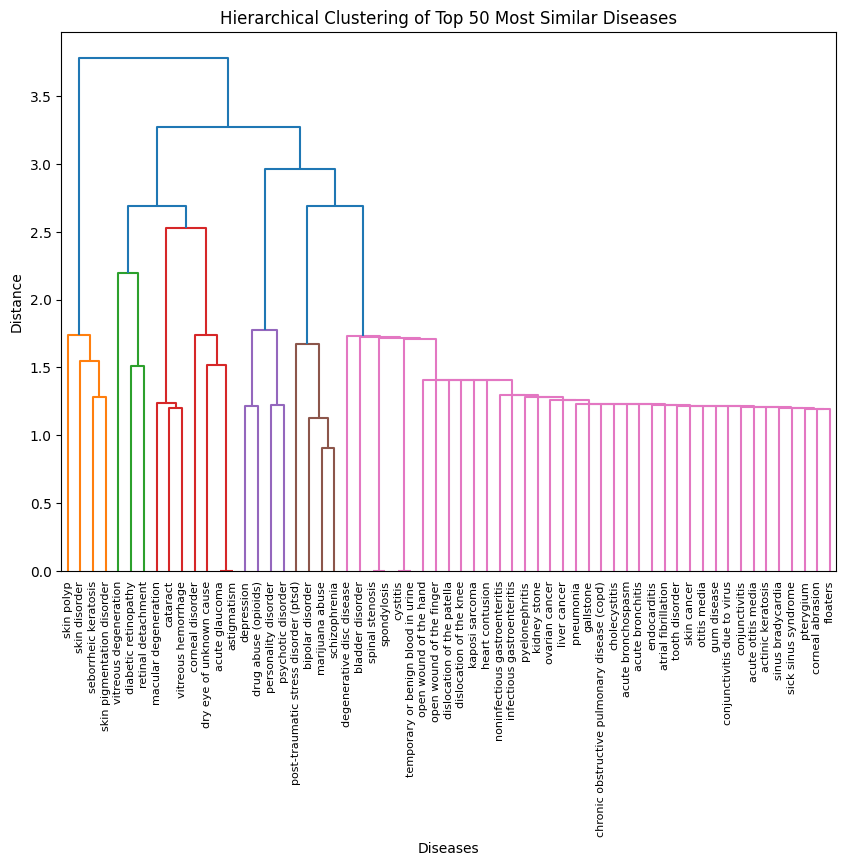

In [19]:
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=diseases_list, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering of Top 50 Most Similar Diseases")
plt.xlabel("Diseases")
plt.ylabel("Distance")
plt.show()

### Using Louvain Algorithm


In [20]:
G = nx.Graph()

for disease in diseases_list:
    G.add_node(disease)

In [21]:
# Add edges with similarity weights
for (disease_1, disease_2), similarity in zip(disease_pairs, similarity_values):
    if similarity > 0:  # Ignore zero similarity pairs
        G.add_edge(disease_1, disease_2, weight=similarity)

In [22]:
import community as community_louvain  # pip install python-louvain

In [23]:
partition = community_louvain.best_partition(G, weight='weight')

# Convert the partition dictionary into clusters
from collections import defaultdict

In [24]:
clusters = defaultdict(list)
for disease, community_id in partition.items():
    clusters[community_id].append(disease)

In [25]:
for community_id, disease_group in clusters.items():
    print(f"Community {community_id}: {disease_group}")

Community 0: ['actinic keratosis', 'seborrheic keratosis', 'skin cancer', 'skin disorder', 'skin pigmentation disorder', 'skin polyp']
Community 1: ['acute bronchitis', 'chronic obstructive pulmonary disease (copd)']
Community 2: ['acute bronchospasm', 'pneumonia']
Community 3: ['acute glaucoma', 'astigmatism', 'cataract', 'corneal abrasion', 'corneal disorder', 'diabetic retinopathy', 'dry eye of unknown cause', 'macular degeneration', 'retinal detachment', 'vitreous degeneration', 'vitreous hemorrhage']
Community 4: ['acute otitis media', 'otitis media']
Community 5: ['atrial fibrillation', 'endocarditis']
Community 8: ['bipolar disorder', 'depression', 'drug abuse (opioids)', 'marijuana abuse', 'personality disorder', 'post-traumatic stress disorder (ptsd)', 'psychotic disorder', 'schizophrenia']
Community 7: ['bladder disorder', 'cystitis', 'temporary or benign blood in urine']
Community 9: ['cholecystitis', 'gallstone']
Community 10: ['conjunctivitis', 'conjunctivitis due to virus

# common diseases idk

In [26]:
# Get the top N similar diseases for each disease
top_n = 5  # Number of top similar diseases to show

for i, disease in enumerate(diseases_list):
    similarities = similarity_matrix[i] # get the similarity scores (ignoring the disease itself)
    
    # get the indices of the most similar diseases
    similar_indices = np.argsort(similarities)[::-1][1:top_n+1]  # this will exclude the disease itself at index 0
    
    print(f"\nTop {top_n} most similar diseases to {disease}:")
    for idx in similar_indices:
        print(f"- {diseases_list[idx]} (Similarity: {similarities[idx]:.4f})")



Top 5 most similar diseases to actinic keratosis:
- vitreous hemorrhage (Similarity: 0.0000)
- corneal abrasion (Similarity: 0.0000)
- gum disease (Similarity: 0.0000)
- gallstone (Similarity: 0.0000)
- floaters (Similarity: 0.0000)

Top 5 most similar diseases to acute bronchitis:
- vitreous hemorrhage (Similarity: 0.0000)
- corneal disorder (Similarity: 0.0000)
- gum disease (Similarity: 0.0000)
- gallstone (Similarity: 0.0000)
- floaters (Similarity: 0.0000)

Top 5 most similar diseases to acute bronchospasm:
- vitreous hemorrhage (Similarity: 0.0000)
- corneal disorder (Similarity: 0.0000)
- gum disease (Similarity: 0.0000)
- gallstone (Similarity: 0.0000)
- floaters (Similarity: 0.0000)

Top 5 most similar diseases to acute glaucoma:
- corneal disorder (Similarity: 0.0000)
- heart contusion (Similarity: 0.0000)
- gum disease (Similarity: 0.0000)
- gallstone (Similarity: 0.0000)
- floaters (Similarity: 0.0000)

Top 5 most similar diseases to acute otitis media:
- vitreous hemorrha

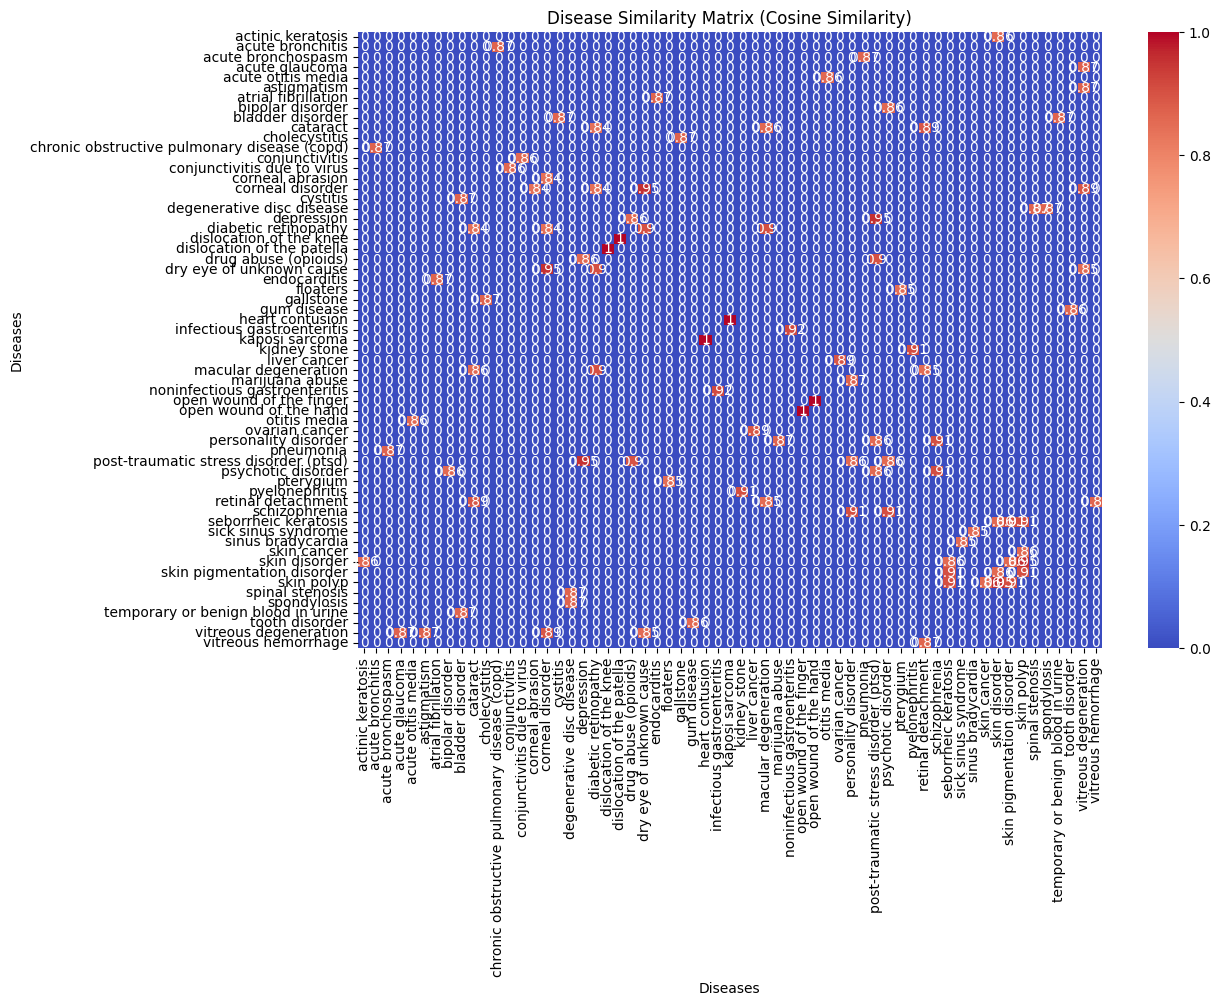

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_matrix, xticklabels=diseases_list, yticklabels=diseases_list, cmap='coolwarm', annot=True)
plt.title("Disease Similarity Matrix (Cosine Similarity)")
plt.xlabel("Diseases")
plt.ylabel("Diseases")
plt.show()

### Diseases in the same community

In [28]:
# Dictionary of diseases by community 
community_groups = defaultdict(list)
for disease, community_id in partition.items():
    community_groups[community_id].append(disease)

for community_id, diseases_in_community in community_groups.items():
    if len(diseases_in_community) > 1:
        print(f"\nCommunity {community_id}: {diseases_in_community}") # show diseases in the same community (likely to be confused with each other)



Community 0: ['actinic keratosis', 'seborrheic keratosis', 'skin cancer', 'skin disorder', 'skin pigmentation disorder', 'skin polyp']

Community 1: ['acute bronchitis', 'chronic obstructive pulmonary disease (copd)']

Community 2: ['acute bronchospasm', 'pneumonia']

Community 3: ['acute glaucoma', 'astigmatism', 'cataract', 'corneal abrasion', 'corneal disorder', 'diabetic retinopathy', 'dry eye of unknown cause', 'macular degeneration', 'retinal detachment', 'vitreous degeneration', 'vitreous hemorrhage']

Community 4: ['acute otitis media', 'otitis media']

Community 5: ['atrial fibrillation', 'endocarditis']

Community 8: ['bipolar disorder', 'depression', 'drug abuse (opioids)', 'marijuana abuse', 'personality disorder', 'post-traumatic stress disorder (ptsd)', 'psychotic disorder', 'schizophrenia']

Community 7: ['bladder disorder', 'cystitis', 'temporary or benign blood in urine']

Community 9: ['cholecystitis', 'gallstone']

Community 10: ['conjunctivitis', 'conjunctivitis du

### Diseases within-community similarities

In [29]:
diseases_list = diseases_list.tolist() if isinstance(diseases_list, np.ndarray) else diseases_list

for community_id, diseases_in_community in community_groups.items():
    if len(diseases_in_community) > 1:
        print(f"\nCommunity {community_id}:")
        for i, disease_1 in enumerate(diseases_in_community):
            for disease_2 in diseases_in_community[i+1:]:
                # Find similarity between each pair within the community
                idx1 = diseases_list.index(disease_1)
                idx2 = diseases_list.index(disease_2)
                similarity = similarity_matrix[idx1, idx2]
                print(f"- {disease_1} <-> {disease_2} (Similarity: {similarity:.4f})")



Community 0:
- actinic keratosis <-> seborrheic keratosis (Similarity: 0.0000)
- actinic keratosis <-> skin cancer (Similarity: 0.0000)
- actinic keratosis <-> skin disorder (Similarity: 0.8581)
- actinic keratosis <-> skin pigmentation disorder (Similarity: 0.0000)
- actinic keratosis <-> skin polyp (Similarity: 0.0000)
- seborrheic keratosis <-> skin cancer (Similarity: 0.0000)
- seborrheic keratosis <-> skin disorder (Similarity: 0.8581)
- seborrheic keratosis <-> skin pigmentation disorder (Similarity: 0.9091)
- seborrheic keratosis <-> skin polyp (Similarity: 0.9091)
- skin cancer <-> skin disorder (Similarity: 0.0000)
- skin cancer <-> skin pigmentation disorder (Similarity: 0.0000)
- skin cancer <-> skin polyp (Similarity: 0.8581)
- skin disorder <-> skin pigmentation disorder (Similarity: 0.8581)
- skin disorder <-> skin polyp (Similarity: 0.9535)
- skin pigmentation disorder <-> skin polyp (Similarity: 0.9091)

Community 1:
- acute bronchitis <-> chronic obstructive pulmonary

In [30]:
# Get all pairs of diseases with their similarity
disease_pairs = []
for i, disease_1 in enumerate(diseases_list):
    for j, disease_2 in enumerate(diseases_list[i+1:], i+1):
        similarity = similarity_matrix[i, j]
        if similarity > 0:  # Ignore zero similarity pairs
            disease_pairs.append((disease_1, disease_2, similarity))

# Sort in descending order
disease_pairs.sort(key=lambda x: x[2], reverse=True)



In [31]:
print("Top 5 most likely to be confused disease pairs:")
for disease_1, disease_2, similarity in disease_pairs[:5]:
    print(f"- {disease_1} <-> {disease_2} (Similarity: {similarity:.4f})")

Top 5 most likely to be confused disease pairs:
- dislocation of the knee <-> dislocation of the patella (Similarity: 1.0000)
- open wound of the finger <-> open wound of the hand (Similarity: 1.0000)
- heart contusion <-> kaposi sarcoma (Similarity: 1.0000)
- corneal disorder <-> dry eye of unknown cause (Similarity: 0.9535)
- depression <-> post-traumatic stress disorder (ptsd) (Similarity: 0.9535)


## gephi
translate to csvs and stuff to import into gephi

In [32]:
disease_pairs = similarity_df[['Disease 1', 'Disease 2']].values
similarity_values = similarity_df['Cosine Similarity'].values

In [33]:
# Create edge list for Gephi (Source, Target, Weight)
edge_list = []
for (disease_1, disease_2), similarity in zip(disease_pairs, similarity_values):
    if similarity > 0:  # Only include edges with similarity > 0
        edge_list.append([disease_1, disease_2, similarity])

edge_df = pd.DataFrame(edge_list, columns=["Source", "Target", "Weight"])
edge_df.to_csv("disease_similarity_edge_list.csv", index=False)

In [34]:
# Create a graph from the edge list
G = nx.Graph()
for (disease_1, disease_2), similarity in zip(disease_pairs, similarity_values):
    if similarity > 0:
        G.add_edge(disease_1, disease_2, weight=similarity)

# Apply Louvain
partition = community_louvain.best_partition(G, weight='weight')

# Create a node list with correct ID and Label format
# Create a mapping of diseases to unique indices
disease_to_index = {disease: idx for idx, disease in enumerate(G.nodes())}

# Create a node list with unique ID, disease name, and community ID
node_list = []
for disease, community_id in partition.items():
    node_list.append([disease_to_index[disease], disease, community_id])  # Use unique index as ID

# Convert to DataFrame and save node list
node_df = pd.DataFrame(node_list, columns=["Id", "Label", "Community"])
node_df.to_csv("disease_nodes_with_communities.csv", index=False)

In [38]:
# Compute Betweenness Centrality
betweenness = nx.betweenness_centrality(G, weight='weight', k=100)

df = pd.DataFrame([(disease_to_index[disease], bet) for disease, bet in betweenness.items()], 
                  columns=["Id", "Betweenness"])
df.to_csv("betweenness_values.csv", index=False)
